In [2]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from scipy.optimize import fsolve

# Zero Uniform State

In [3]:
def calculate_zero_state_flux(p, m, a=33.33, f=0.01, delta_h=1/300):
    h = p / (a)
    j = - 2 * delta_h * m * h
    return np.abs(j)

In [4]:
print(f"{calculate_zero_state_flux(1.1, 1):.3E}")
print(f"{calculate_zero_state_flux(1.25, 1):.3E}")
print(f"{calculate_zero_state_flux(1.3, 1):.3E}")

2.200E-04
2.500E-04
2.600E-04


# Nonzero Uniform State

In [5]:
def find_zeroes(state, p, m):
    nu = 10 / 3
    eta = 3.5
    rho = 0.95
    gamma = 50 / 3
    delta_b = 1 / 30
    delta_w = 10 / 3
    delta_h = 1e-2 / 3
    a = 33.33
    q = 0.05
    f = 0.1
    
    b, w, h = state

    S = (1 + eta * b)**2
    Gb = nu * w * S
    Gw = gamma * b * S
    I = a * (b + q*f) / (b + q)

    eq_b = Gb*b*(1-b) - b
    eq_w = I*h - nu*(1-rho*b)*w - Gw*w
    eq_h = p - I*h + 2 * delta_h * m * h

    return eq_b, eq_w, eq_h

def calculate_nonzero_state_flux(p, m):
    func = partial(find_zeroes, p=p, m=m)
    b, w, h = fsolve(find_zeroes, (1, 1, 1), args=(p, m))
    
    J = -m * h
    return J


/home/yotamo/anaconda3/envs/dedalus3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


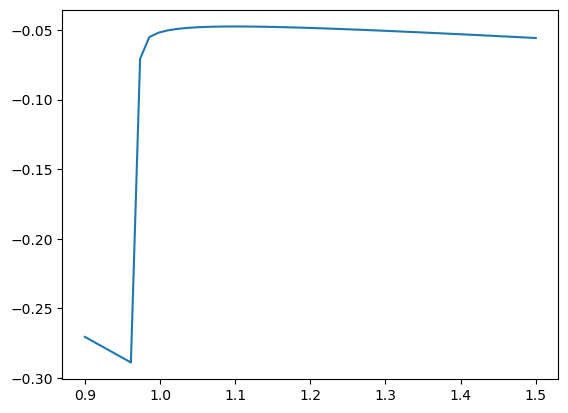

In [6]:
ps = np.linspace(0.9, 1.5)
js = [calculate_nonzero_state_flux(p, 1) for p in ps]
plt.plot(ps, js, label="zero state")